<a href="https://colab.research.google.com/github/Sanjayvaradha/Track1/blob/master/Traffic_signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [ ]:
!ls german-traffic-signs #test.p is a pickled file,converts all objects to char stream,contains serialized data.

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
import random
from tensorflow.keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D
import pickle
import pandas as pd # to read csv files



In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p','rb') as f:    # with - to excute two operations in pair and have block of code inbtw
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f: 
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
print(type(train_data))

X_train, y_train = train_data['features'], train_data['labels']  # features - values of tranining data
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

<class 'dict'>


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not eqaul to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not eqaul to number of labels"
assert(X_valid.shape[0]==y_valid.shape[0]), "The number of images is not eqaul to number of labels"
assert(X_train.shape[1:]==(32,32,3)), "The number of images are not 32*32*1"
assert(X_test.shape[1:]==(32,32,3)), "The number of images are not 32*32*1"
assert(X_valid.shape[1:]==(32,32,3)), "The number of images are not 32*32*1"

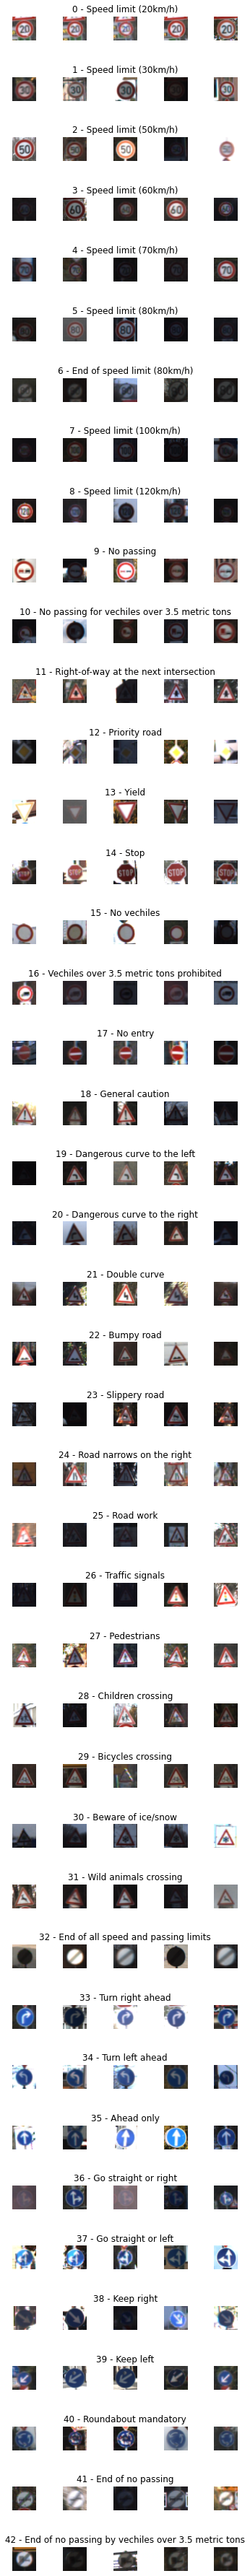

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
  
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout() # worksout on issues with overlapping on plots
 
for i in range(cols):
      for j, row in data.iterrows(): # iterate over entire data frame rows as index & series pairs, j holds index values
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))  

In [ ]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'num of images')

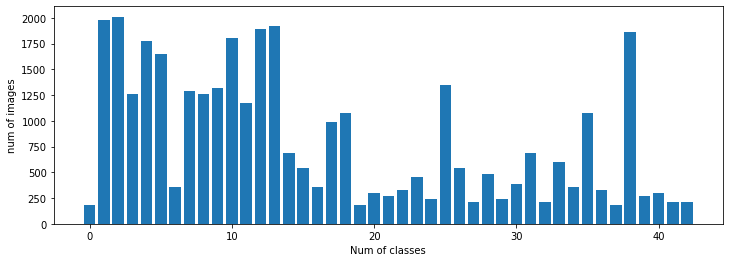

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.xlabel('Num of classes')
plt.ylabel('num of images')

(32, 32, 3)
36


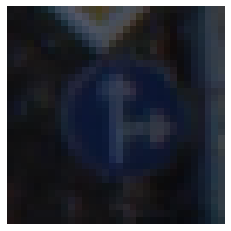

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


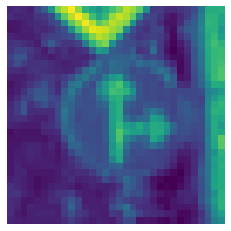

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])         
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


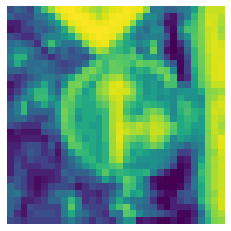

In [ ]:
# histogram - equalise brightness equally
def equalise(img):
  img = cv2.equalizeHist(img)
  return img

img = equalise(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [ ]:
def preprocess(img):
  img = grayscale(img)
  img = equalise(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocess, X_train))) # map - iterate through entire array in format of list 2nd arg-which one is going to process
X_valid = np.array(list(map(preprocess, X_valid))) 
X_test = np.array(list(map(preprocess, X_test))) 


(34799, 32, 32)


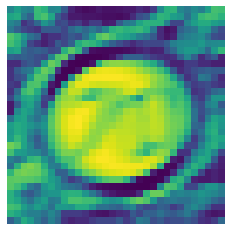

In [ ]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.2,
                              shear_range=0.1,
                              rotation_range=10) #zoom - [1-0.2(zoom out),1+0.2]
              
data_gen.fit(X_train)

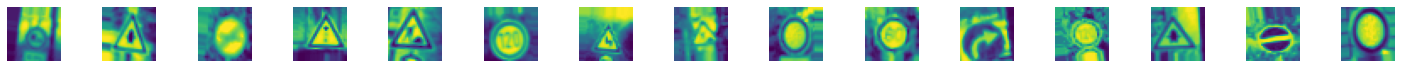

In [ ]:
batches = data_gen.flow(X_train,y_train,batch_size=20)
X_batch, y_batch= next(batches)

fig,axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')

In [ ]:
y_train = to_categorical(y_train,43)
y_valid = to_categorical(y_valid,43)
y_test = to_categorical(y_test,43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation = 'relu')) #30- no.of filters, 5,5 - kernelsize , output will be 28,28,30 bcz of 30filters which add depth
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2))) # output will be 14,14,30

  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  

  model.add(Flatten())
  model.add(Dense(500,activation= 'relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation = 'softmax'))
  #compilation
  model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


In [ ]:
model =  modified_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 480)             

In [ ]:
history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size=20),
                              steps_per_epoch=1500,
                              epochs=10,
                              validation_data=(X_valid, y_valid), shuffle = 1)

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 1.1920 - accuracy: 0.6574 - val_loss: 0.2223 - val_accuracy: 0.9361
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3268 - accuracy: 0.8999 - val_loss: 0.1387 - val_accuracy: 0.9531
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2081 - accuracy: 0.9348 - val_loss: 0.0709 - val_accuracy: 0.9791
Epoch 4/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1640 - accuracy: 0.9491 - val_loss: 0.0655 - val_accuracy: 0.9780
Epoch 5/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1387 - accuracy: 0.9572 - val_loss: 0.0493 - val_accuracy: 0.9848
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.1170 - accuracy: 0.9634 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1066 - accuracy: 0.9680 - val_loss: 0.0371 -

Text(0.5, 0, 'epoch')

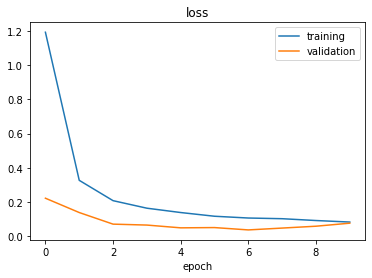

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

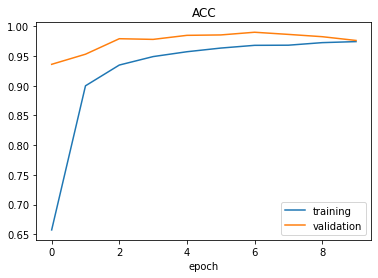

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('ACC')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Score of testdata',score[0])
print('Accuracy of testdata',score[1])

Score of testdata 0.19114696979522705
Accuracy of testdata 0.9525732398033142


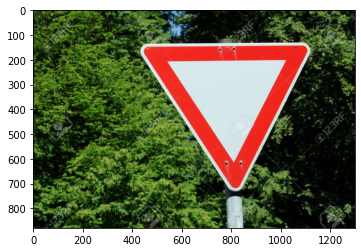

In [ ]:
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


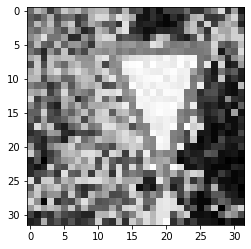

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img = img.reshape(1, 32, 32, 1)

In [ ]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [13]
